In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
db_data = pd.read_csv('diabetes.csv')

In [3]:
db_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
db_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
db_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

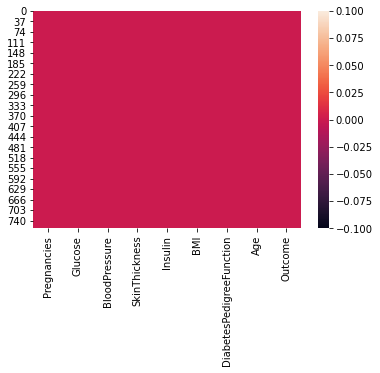

In [6]:
sns.heatmap(db_data.isnull())

In [7]:
db_data.shape

(768, 9)

In [8]:
db_data.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [9]:
db_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
db_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = \
db_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0, np.NaN)

<AxesSubplot:>

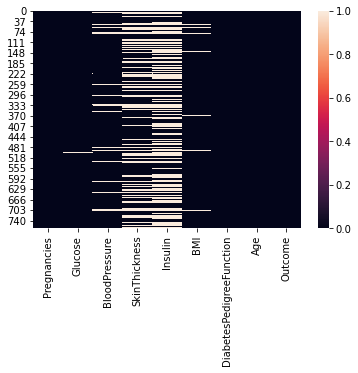

In [11]:
sns.heatmap(db_data.isnull())

In [12]:
db_data.fillna(db_data.mean(), inplace = True)

<AxesSubplot:>

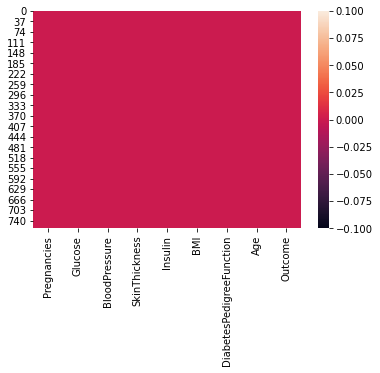

In [13]:
sns.heatmap(db_data.isnull())

In [14]:
db_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


<AxesSubplot:>

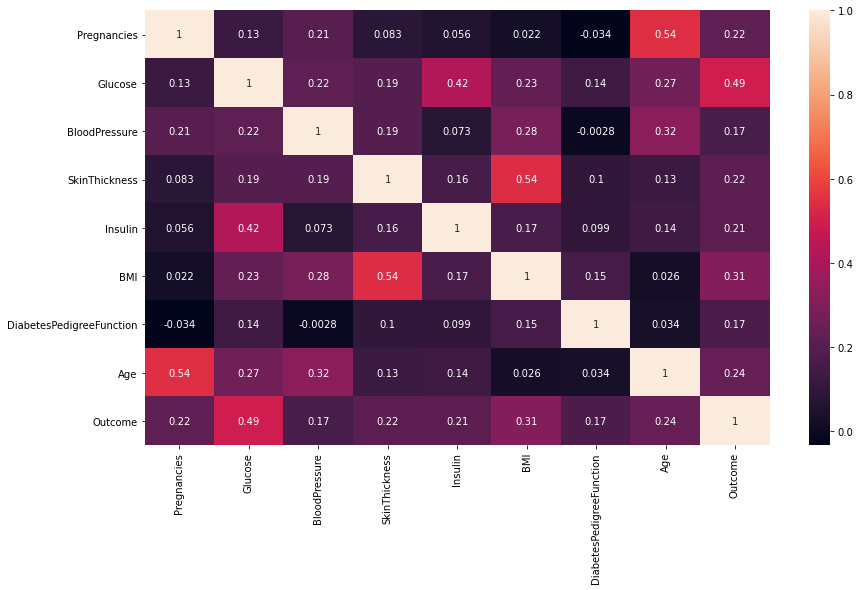

In [15]:
plt.figure(figsize= (14,8))
sns.heatmap(db_data.corr(), annot= True)

In [16]:
X = db_data[['Glucose', 'BMI','Age']]
y= db_data['Outcome']

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size= 0.3, random_state = 101)

In [19]:
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)

In [20]:
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=19)

In [21]:
predict = knn.predict(X_test)

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       150
           1       0.71      0.64      0.68        81

    accuracy                           0.78       231
   macro avg       0.76      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



## Logistic Regression

In [24]:
lg = LogisticRegression()

In [25]:
lg.fit(X_train, y_train)

LogisticRegression()

In [26]:
pred = lg.predict(X_test)

In [27]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.71      0.58      0.64        81

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
cross_val_score(knn, X, y, cv = 5, scoring = 'accuracy')

array([0.77272727, 0.72727273, 0.77922078, 0.81699346, 0.75816993])

In [30]:
'''
Precision - Number of TP/ (Number of TP + Number of FP) 
Recall - Number of TP / (Number of TP + Number of FN)
f1 Score - 2 * (precision * recall) / (precision + recall)
Accuracy - (TP + TN) / Total number of predictions
'''

'\nPrecision - Number of TP/ (Number of TP + Number of FP) \nRecall - Number of TP / (Number of TP + Number of FN)\nf1 Score - 2 * (precision * recall) / (precision + recall)\nAccuracy - (TP + TN) / Total number of predictions\n'

## KNN folds

In [31]:
folds = 10

In [47]:
(9/10)* len(X)

691.2

In [48]:
ks = list(range(1, int((9/10)*len(X)), 2))
ks

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 117,
 119,
 121,
 123,
 125,
 127,
 129,
 131,
 133,
 135,
 137,
 139,
 141,
 143,
 145,
 147,
 149,
 151,
 153,
 155,
 157,
 159,
 161,
 163,
 165,
 167,
 169,
 171,
 173,
 175,
 177,
 179,
 181,
 183,
 185,
 187,
 189,
 191,
 193,
 195,
 197,
 199,
 201,
 203,
 205,
 207,
 209,
 211,
 213,
 215,
 217,
 219,
 221,
 223,
 225,
 227,
 229,
 231,
 233,
 235,
 237,
 239,
 241,
 243,
 245,
 247,
 249,
 251,
 253,
 255,
 257,
 259,
 261,
 263,
 265,
 267,
 269,
 271,
 273,
 275,
 277,
 279,
 281,
 283,
 285,
 287,
 289,
 291,
 293,
 295,
 297,
 299,
 301,
 303,
 305,
 307,
 309,
 311,
 313,
 315,
 317,
 319,
 321,
 323,
 325,
 327,
 329,
 331,
 333,
 335,
 337,
 339,
 341,
 343,
 345,
 347,
 349,
 351,

In [43]:
knnAccuracy = []

In [49]:
for k in ks:
    testKNN = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(testKNN, X, y, cv= 10, scoring= 'accuracy').mean()
    knnAccuracy.append(score)
    

In [50]:
knnAccuracy

[0.6835099111414901,
 0.7187457279562542,
 0.7291011619958988,
 0.7434381408065618,
 0.7395762132604238,
 0.7539302802460697,
 0.7630553656869447,
 0.7604237867395762,
 0.7669343814080657,
 0.7721462747778537,
 0.7669343814080655,
 0.7682159945317839,
 0.7630382775119618,
 0.7682843472317157,
 0.7630724538619276,
 0.7670027341079974,
 0.765686944634313,
 0.7656869446343132,
 0.7669856459330144,
 0.7630724538619276,
 0.7617737525632263,
 0.7644053315105948,
 0.7604921394395079,
 0.7643711551606289,
 0.7578776486671224,
 0.7552802460697198,
 0.7592105263157894,
 0.7552973342447026,
 0.7553144224196855,
 0.7526999316473001,
 0.7514012303485987,
 0.7539986329460013,
 0.7526999316473,
 0.7513841421736159,
 0.7487696514012304,
 0.7500683526999318,
 0.7539644565960356,
 0.7500683526999317,
 0.7526657552973343,
 0.7487525632262474,
 0.7526657552973343,
 0.7552631578947369,
 0.7552460697197539,
 0.7565618591934382,
 0.7539644565960356,
 0.7539815447710185,
 0.7526486671223513,
 0.75396445659603

In [54]:
 maxScore = max(knnAccuracy)

In [55]:
knnAccuracy.index(maxScore)

9

In [56]:
ks[knnAccuracy.index(maxScore)]

19

In [58]:
finalKNN = KNeighborsClassifier(n_neighbors= 19)
finalKNN.fit(X,y)

KNeighborsClassifier(n_neighbors=19)

In [59]:
import pickle

In [60]:
pickle.dump(finalKNN, open('diabetes.pkl', 'wb'))

In [61]:
loadedModel = pickle.load(open('diabetes.pkl', 'rb'))

In [62]:
loadedModel

KNeighborsClassifier(n_neighbors=19)

In [64]:
loadedModel.predict([[150,25,40]])

array([0], dtype=int64)

In [65]:
loadedModel.predict([[250,25,40]])

array([1], dtype=int64)